<a href="https://colab.research.google.com/github/DrKamaleshR/Customersegmentation-unsupervised/blob/main/MASTERCOPY_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
from sklearn.cluster import AgglomerativeClustering

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
CS = pd.read_excel('/content/drive/My Drive/almabetter projects/Customer Segmentation/DataResources/Online Retail.xlsx')

In [ ]:
CS.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
CS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
CS.shape

(541909, 8)

In [ ]:
CS.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### **EDA**

In [ ]:
#checking for null values
CS.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

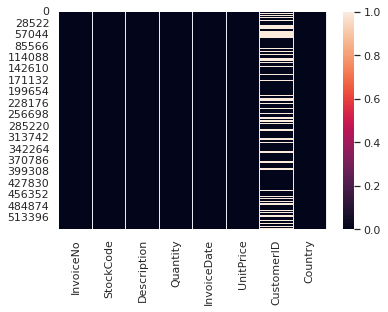

In [ ]:
#visualising null values
sns.heatmap(CS.isnull())

About 24.93% customer IDs are missing in the dataset and 0.27% product descriptions are missing these features cannot be imputed as they are unique for each customer, so we have to drop these variable values.

In [ ]:
CS.dropna(axis = 0, inplace = True)
CS.shape

(406829, 8)

<AxesSubplot:>

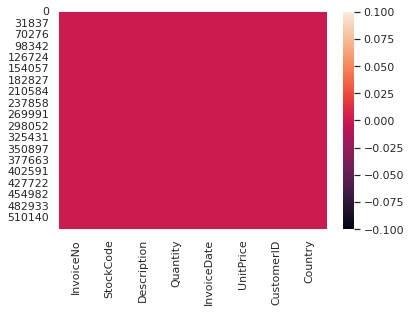

In [ ]:
sns.heatmap(CS.isnull())

In [ ]:
CS.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
CS.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#we need to drop produsts which are cancelled from the dataset. Cancelled data can be identified as "InvoiceNo" starting with 'C'.
CS['InvoiceNo'] = CS['InvoiceNo'].astype('str')
CS2=CS[~CS['InvoiceNo'].str.contains('C')]

In [ ]:
CS2.shape

(397924, 8)

We can split 'InvoiceDate' variable as 'Iyear','Imonth','Iday'and'Ihour'. 

In [ ]:
CS2["Invoice_Year"] = CS2['InvoiceDate'].dt.year
CS2['Invoice_Month'] = CS2['InvoiceDate'].dt.strftime('%B')
CS2['Invoice_Day'] = CS2['InvoiceDate'].dt.strftime('%A')
CS2['Invoice_Hour'] = CS2['InvoiceDate'].dt.hour

In [ ]:
#We have the 'UnitPrice' and 'Quantity', through this we can calculate the 'TotalExpenditure' of each Invoice.
CS2['TotalExpenditure']=CS2['Quantity']*CS2['UnitPrice'] 

In [ ]:
CS2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Hour,TotalExpenditure
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34


In [ ]:
CS2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         397924 non-null  object        
 1   StockCode         397924 non-null  object        
 2   Description       397924 non-null  object        
 3   Quantity          397924 non-null  int64         
 4   InvoiceDate       397924 non-null  datetime64[ns]
 5   UnitPrice         397924 non-null  float64       
 6   CustomerID        397924 non-null  float64       
 7   Country           397924 non-null  object        
 8   Invoice_Year      397924 non-null  int64         
 9   Invoice_Month     397924 non-null  object        
 10  Invoice_Day       397924 non-null  object        
 11  Invoice_Hour      397924 non-null  int64         
 12  TotalExpenditure  397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memor

In [ ]:
CS2.describe()

,Quantity,UnitPrice,CustomerID,Invoice_Year,Invoice_Hour,TotalExpenditure
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,2010.934259,12.728247,22.394749
std,180.420210,22.096788,1713.169877,0.247829,2.273535,309.055588
min,1.000000,0.000000,12346.000000,2010.000000,6.000000,0.000000
25%,2.000000,1.250000,13969.000000,2011.000000,11.000000,4.680000
50%,6.000000,1.950000,15159.000000,2011.000000,13.000000,11.800000
75%,12.000000,3.750000,16795.000000,2011.000000,14.000000,19.800000
max,80995.000000,8142.750000,18287.000000,2011.000000,20.000000,168469.600000


Lets find out the top

1.customers

2.countries with sales

3.product

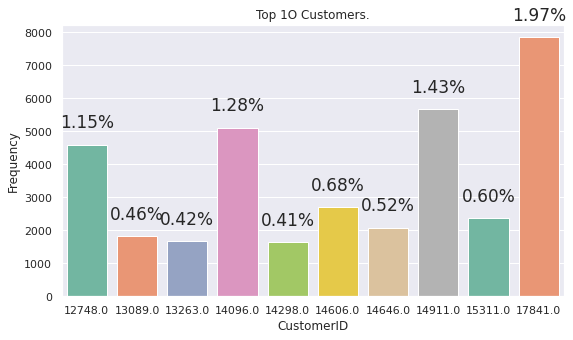

In [ ]:
#Top 10 customers
TopCustomers = pd.DataFrame(CS2['CustomerID'].value_counts().sort_values(ascending = False).reset_index())
TopCustomers.rename(columns = {'index':'CustomerID','CustomerID':'counts'},inplace = True)
plt.figure(figsize = (9,5))
plot1=sns.barplot(x = 'CustomerID',y = 'counts',palette= 'Set2',data = TopCustomers[:10])
plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.title("Top 1O Customers.")
for p in plot1.patches:                              
    height = p.get_height()
    plot1.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/CS2.shape[0]*100),ha = "center", size = 17)

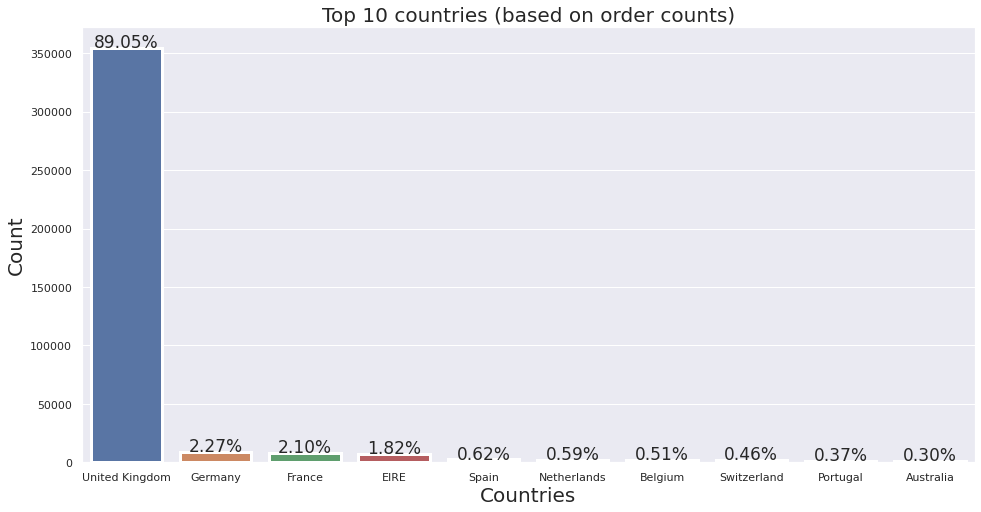

In [ ]:
#Top 10 countries
top_countries = pd.DataFrame(CS2['Country'].value_counts().sort_values(ascending = False).reset_index())
top_countries['Country %']= top_countries['Country']*100/CS2['Country'].count()
top_countries.rename(columns = {'index':'Country','Country':'TotalCounts'},inplace = True)
fig, ax = plt.subplots(figsize = (16,8))
splot = sns.barplot(x='Country',y='TotalCounts',data = top_countries[:10], lw = 3)
plt.title('Top 10 countries (based on order counts)', size = 20)
plt.xlabel('Countries', size = 20)
plt.ylabel('Count', size = 20)
for p in splot.patches:                              
    height = p.get_height()
    splot.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/CS2.shape[0]*100),ha = "center", size = 17)


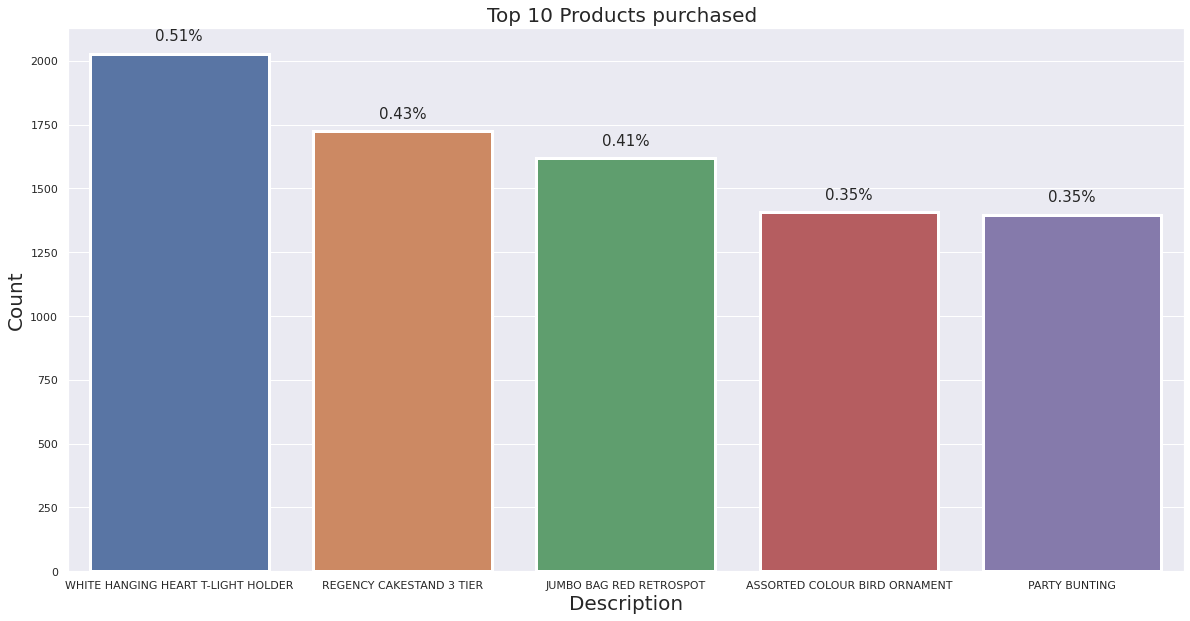

In [ ]:
#Top 5 Products
TopProducts = pd.DataFrame(CS2['Description'].value_counts().sort_values(ascending = False).reset_index())
TopProducts['Description %']= TopProducts['Description']*100/CS2['Description'].count()
TopProducts.rename(columns = {'index':'Description','Description':'TotalCounts'},inplace = True)
fig, ax = plt.subplots(figsize = (20,10))
plot3 = sns.barplot(x='Description',y='TotalCounts',data = TopProducts[:5], lw = 3)
plt.title('Top 10 Products purchased ', size = 20)
plt.xlabel('Description', size = 20)
plt.ylabel('Count', size = 20)
for p in plot3.patches:                              
    height = p.get_height()
    plot3.text(p.get_x()+p.get_width()/2, height+50, '{:1.2f}''%'.format(height/CS2.shape[0]*100),ha = "center", size = 15)


Top months of purchase

In [ ]:
def PLOT(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/ 10-0.05 
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
       
    plt.xticks(rotation=90)
    plt.show()

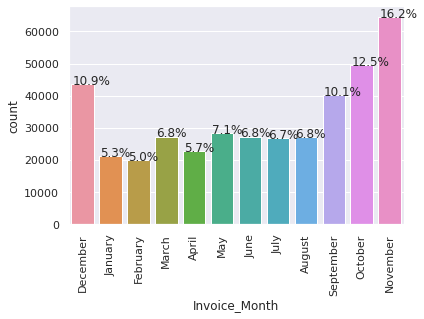

In [ ]:
ax = sns.countplot(CS2['Invoice_Month'])
PLOT(ax, CS2['Invoice_Month'])

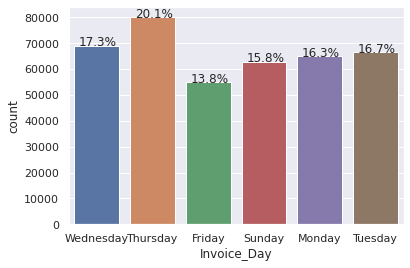

In [ ]:

ax = sns.countplot(CS2['Invoice_Day'])
PLOT(ax, CS2['Invoice_Day'])

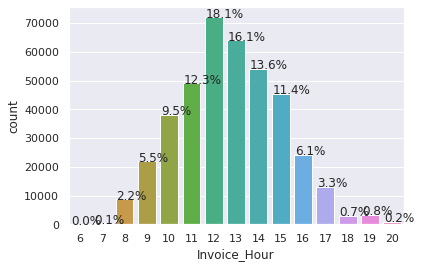

In [ ]:

ax = sns.countplot(CS2['Invoice_Hour'])
PLOT(ax, CS2['Invoice_Hour'])

<AxesSubplot:xlabel='TotalExpenditure', ylabel='Density'>

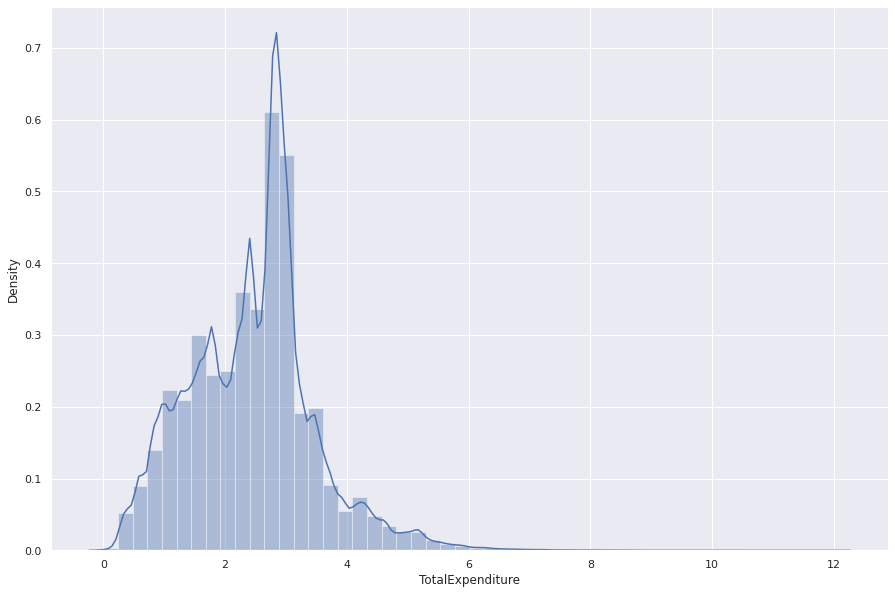

In [ ]:
# Distribution of total expenditure
plt.figure(figsize=(15,10))
sns.distplot(np.log1p(CS2['TotalExpenditure']))

### **RFM Segmentation**
Recency,Frequencyand Monetary(RFM)is a technique to evaluate customers based on their transactions.The evaluation is based on;

How recent their last transaction was(Recency)?

How many transactions they have made in the last year(Frequency)?

What was the value of their transaction was(Monetary)? 



In [ ]:
#Calculating RFM scores
import datetime as dt
LD = dt.datetime(2011,12,10)
#Creating RFM scores for each customer
RFM = CS2.groupby('CustomerID').agg({'InvoiceDate': lambda x: (LD - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalExpenditure': lambda x: x.sum()})

#Converting Invoice Date into type int
RFM['InvoiceDate'] = RFM['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFM.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalExpenditure': 'Monetary'}, inplace=True)

RFM.reset_index().head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [ ]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4339 non-null   int64  
 1   Frequency  4339 non-null   int64  
 2   Monetary   4339 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6 KB


In [ ]:
RFM.shape

(4339, 3)

In [ ]:
#RFM descriptives
RFM.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,92.041484,91.708689,2053.793018
std,100.007757,228.792852,8988.248381
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,307.245000
50%,50.000000,41.000000,674.450000
75%,141.500000,100.000000,1661.640000
max,373.000000,7847.000000,280206.020000


<AxesSubplot:xlabel='Recency', ylabel='Density'>

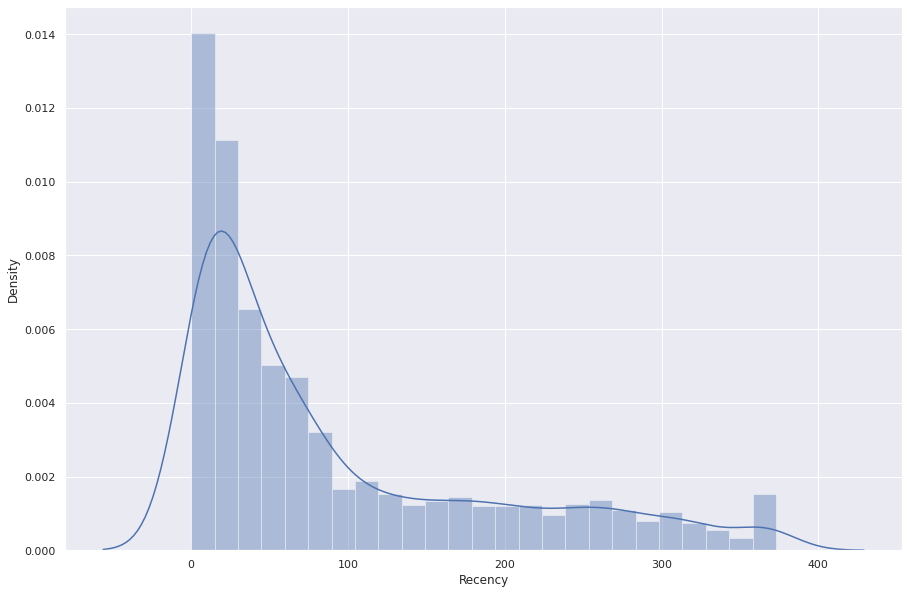

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(RFM['Recency'])

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

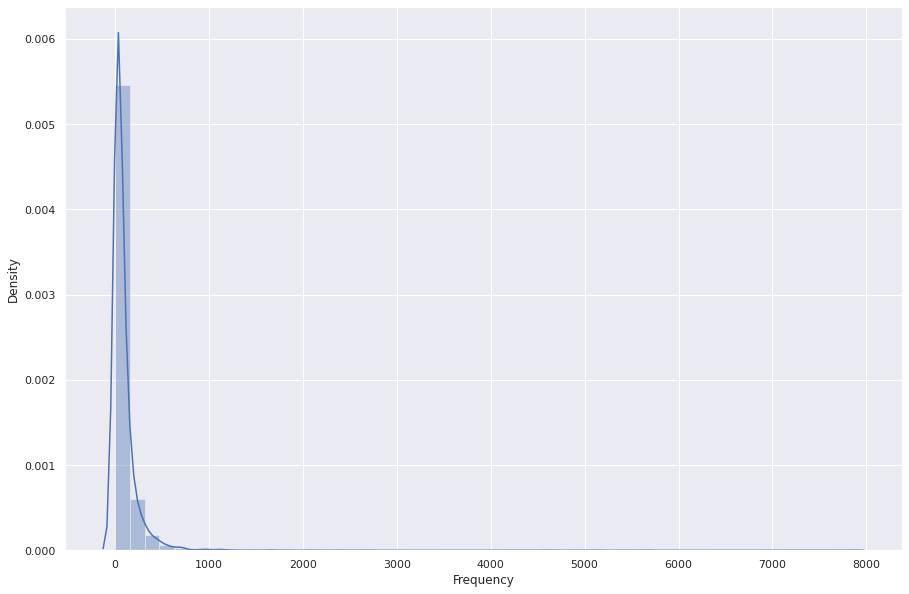

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(RFM['Frequency'])

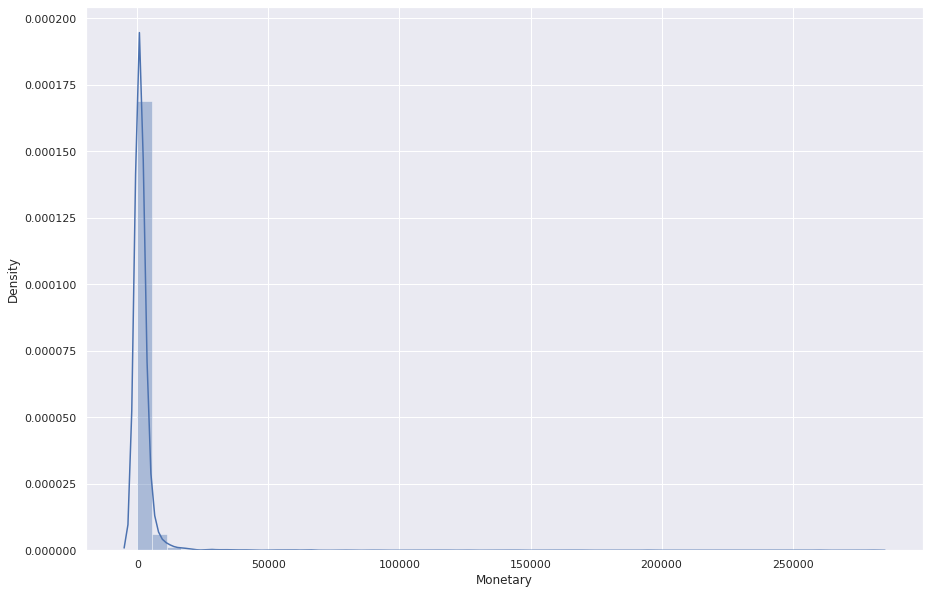

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(RFM['Monetary'])

In [ ]:
#log trnsformation
RFM['Recency'] = np.log(RFM['Recency']+1) 
RFM['Frequency'] = np.log(RFM['Frequency']+1)
RFM['Monetary'] = np.log(RFM['Monetary']+1)

Text(0.5, 0.98, 'Data distribution after log transform')

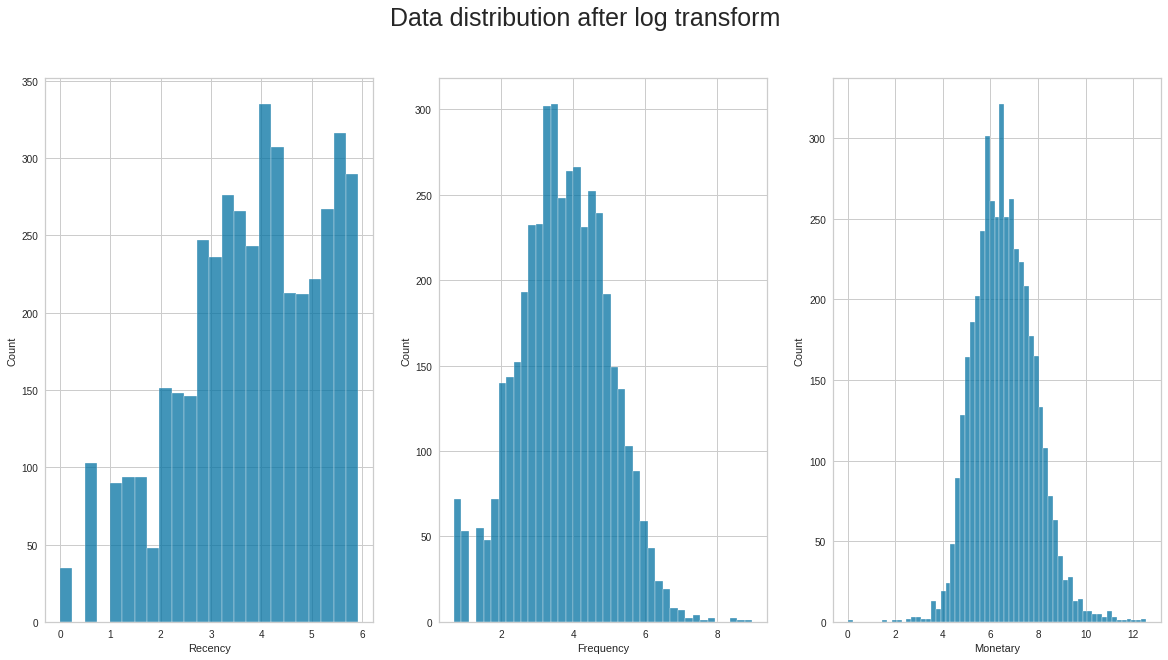

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols= 3, figsize=(20,10))
sns.histplot(RFM['Recency'], ax=axis[0])
sns.histplot(RFM['Frequency'], ax=axis[1])
sns.histplot(RFM['Monetary'], ax=axis[2])
fig.suptitle("Data distribution after log transform", size=25)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, 'Data Visualization')

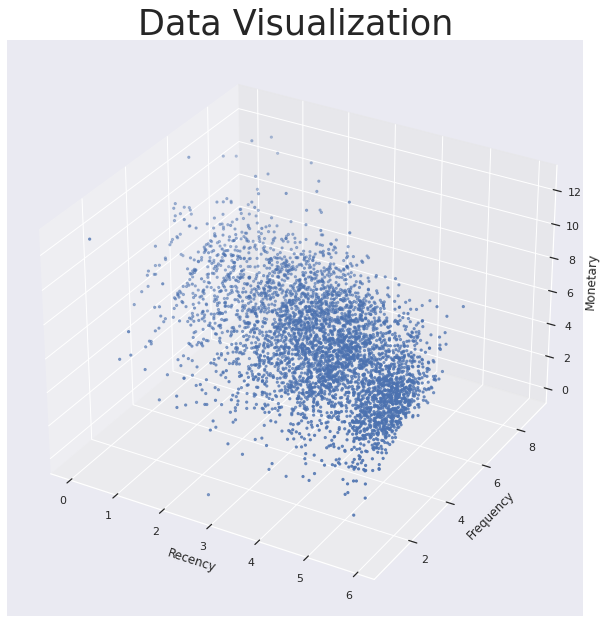

In [ ]:
# plot data points in 3D space
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
x = RFM['Recency']
y = RFM['Frequency']
z = RFM['Monetary']
ax.scatter(x, y, z, marker='.')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title("Data Visualization", size=35)

In [ ]:
RFM.shape

(4339, 3)

### **Deciding** **on** **Optimal** **CLUSTERS**

**Hierachial clustering**

It is used for taking decision on number of clusters.

In [ ]:
rcParams['figure.figsize'] = 30, 15
HC = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')
yHC = HC.fit_predict(RFM)

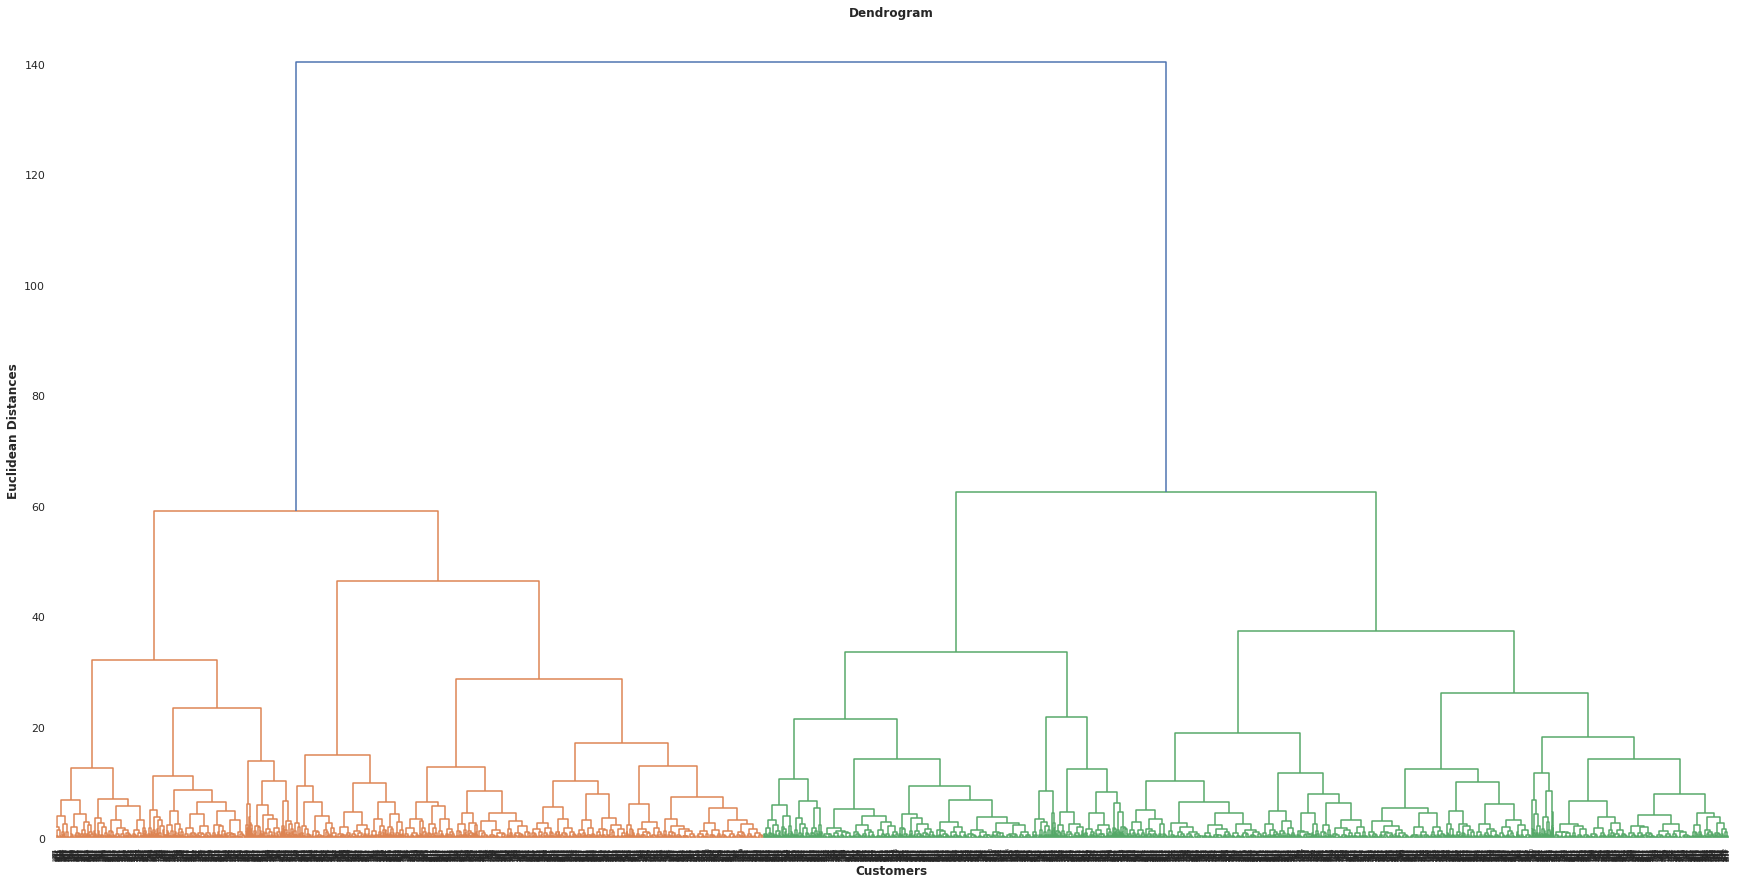

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(RFM, method = 'ward'))
plt.title('Dendrogram',fontweight = 'bold')
plt.xlabel('Customers',fontweight = 'bold')
plt.ylabel('Euclidean Distances',fontweight = 'bold')
plt.show()

Dendrogram is usually subjective as it differs based on viewer. However, we can specifically determine the clusters through a euclidean distance based threshold value. I am keeping the Threshold cut off of 50 euclidean.

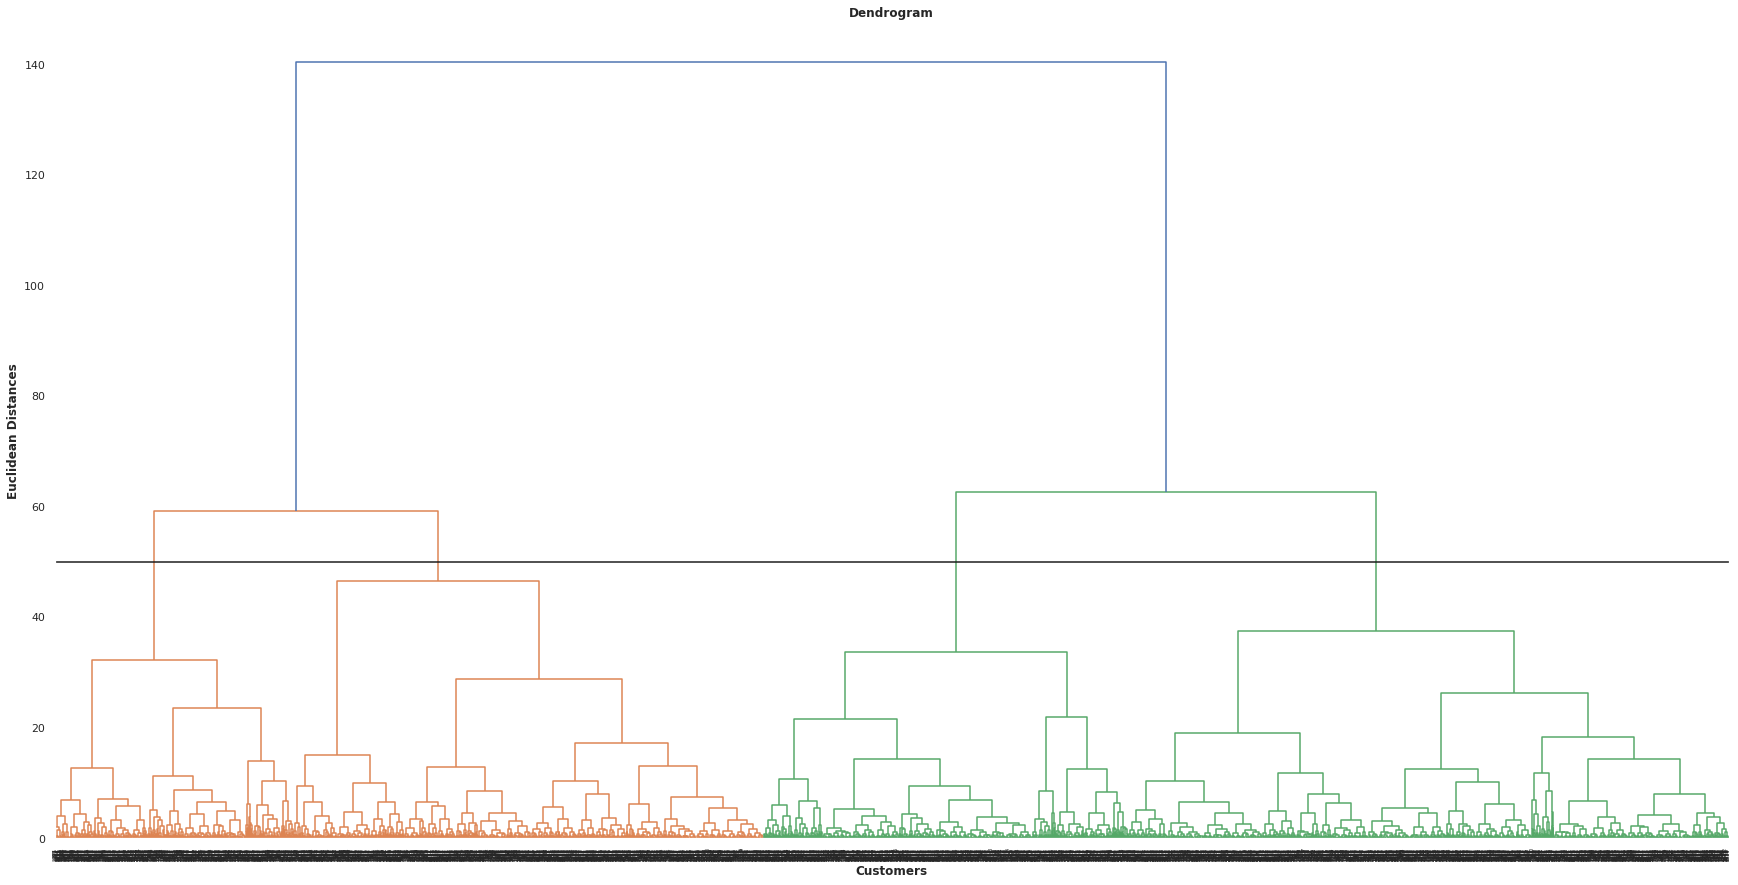

In [ ]:
max_d = 50
dendrogram = sch.dendrogram(sch.linkage(RFM, method = 'ward'))
plt.axhline(y = max_d,c = 'k')
plt.title('Dendrogram',fontweight = 'bold')
plt.xlabel('Customers',fontweight = 'bold')
plt.ylabel('Euclidean Distances',fontweight = 'bold')
plt.show()

Based on the cut-off we can decide to select 4 optimal clusters.

**K**-**Means** **Clustering**

In [ ]:
from sklearn.cluster import KMeans

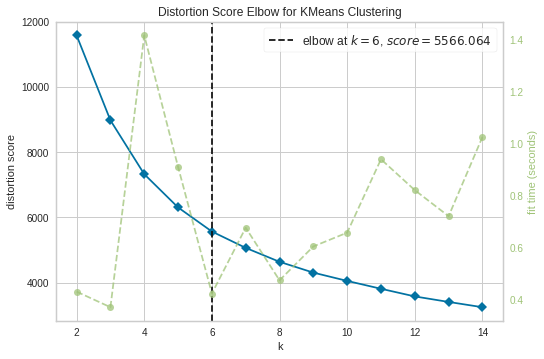

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#elbow plot
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15), timings= True)
visualizer.fit(RFM)        # Fit data to visualizer
visualizer.show()

The elbow point is achieved with 6 clusters which is highlighted by the function itself. The function also informs us about how much time was needed to plot models for various numbers of clusters through the green line.



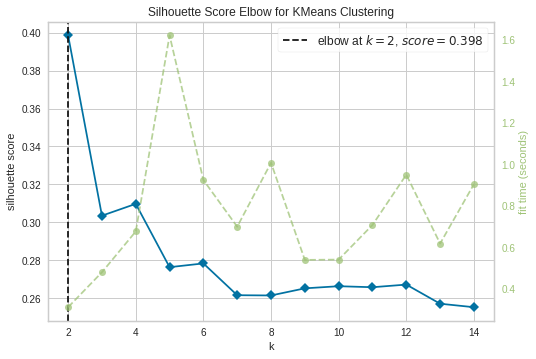

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# Silhouette Score for K means
# Import ElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15),metric='silhouette', timings= True)
visualizer.fit(RFM)        # Fit the data to the visualizer
visualizer.show()  

The Silhouette Coefficient(SC) tells us if individual points are correctly assigned to their clusters. We can use the following thumb rules while using Silhouette Coefficient:

1.SC close to 0 means that the point is between two clusters.

2.If it is closer to -1, then we would be better off assigning it to the other clusters.

3.If SC is close to 1, then the point belongs to the ‘correct’ cluster.

Here we can see the optimal clusters through siloutte method is 2.





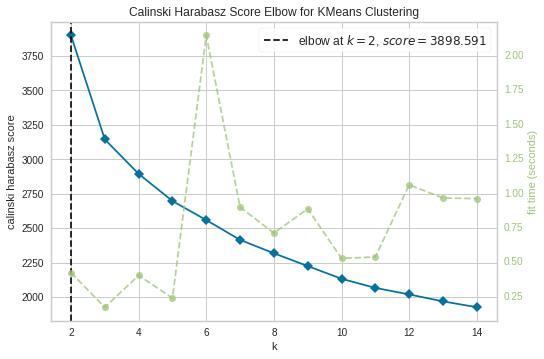

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
# Calinski Harabasz Score for K means
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15),metric='calinski_harabasz', timings= True)
visualizer.fit(RFM)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure  

Calinski Harabasz Index is ideal when number of clusters is 2 for the K means clustering algorithm. 

In [ ]:
# Davies Bouldin score for K means
from sklearn.datasets import load_iris
from sklearn.metrics import davies_bouldin_score

In [ ]:
iris = load_iris()
RFM = iris.data[:, :2]

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=30)
labels = kmeans.fit_predict(RFM)

In [ ]:
db_index = davies_bouldin_score(RFM, labels)
print(db_index)

0.808189181695504


In [ ]:
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(RFM)
    db_index = davies_bouldin_score(RFM, labels)
    results.update({i: db_index})

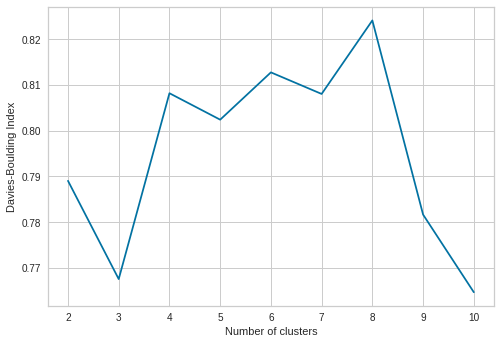

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

Davies Bouldin score is minimized with 3 clusters and can be considered for the k means algorithm

In [ ]:
# BIC for GMM
from sklearn.mixture import GaussianMixture
n_components = range(1, 15)
covariance_type = ['spherical', 'tied', 'diag', 'full']
BICscore=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov)
        gmm.fit(RFM)
        BICscore.append((cov,n_comp,gmm.bic(RFM)))
BICscore

[('spherical', 1, 616.6153878115217),
 ('spherical', 2, 573.5896001510241),
 ('spherical', 3, 564.2527231112329),
 ('spherical', 4, 575.0259808449578),
 ('spherical', 5, 567.2373044760494),
 ('spherical', 6, 574.5295758850435),
 ('spherical', 7, 576.20257088623),
 ('spherical', 8, 591.7784261955583),
 ('spherical', 9, 605.6132148856224),
 ('spherical', 10, 605.9927875263344),
 ('spherical', 11, 614.9020546544191),
 ('spherical', 12, 628.5292256965708),
 ('spherical', 13, 639.3557987165706),
 ('spherical', 14, 651.9617498261679),
 ('tied', 1, 566.5971289583189),
 ('tied', 2, 530.9498724430027),
 ('tied', 3, 527.3089054664575),
 ('tied', 4, 542.1239797439989),
 ('tied', 5, 533.2372514830136),
 ('tied', 6, 538.2062150975617),
 ('tied', 7, 555.1025037799577),
 ('tied', 8, 566.7584158305276),
 ('tied', 9, 564.3510419265081),
 ('tied', 10, 572.2880847738454),
 ('tied', 11, 580.0675542149602),
 ('tied', 12, 611.1975011983884),
 ('tied', 13, 613.3607178480052),
 ('tied', 14, 618.3289322426538)

The lower the BIC score, better is the model.try out various combinations of the parameters and select the model with the lowest BIC score. Based on low average BIC scores on  we can choose the optimal clusters to be 3 .

## **SUMMARY**

In [ ]:
dictr = {"Model_Name":["Hierachicalclustering-Dendrogram ","KMeans-Distortion score Elbow method  ", "KMeans-Silhouette","KMeans-Calinski Harbasz score","KMeans-Davies Bouldin score","BIC-GMM "],
  "Data":["RFM", "RFM", "RFM","RFM","RFM","RFM"],
  "Optimal_Number_of_cluster":[4,6,2,2,3,3]}

In [ ]:
Summary = pd.DataFrame(dictr)

In [ ]:
Summary.head(6)

,Model_Name,Data,Optimal_Number_of_cluster
0,Hierachicalclustering-Dendrogram,RFM,4
1,KMeans-Distortion score Elbow method,RFM,6
2,KMeans-Silhouette,RFM,2
3,KMeans-Calinski Harbasz score,RFM,2
4,KMeans-Davies Bouldin score,RFM,3
5,BIC-GMM,RFM,3


Multiple techniques to detect optimal clusters shows varied results. We can take mean value(3.33) as the number of clusters,3 

K=3 have optimal score. Let's visualize these clusters.

In [ ]:
RFM.shape

(4339, 3)

In [ ]:
Clusters = KMeans(n_clusters=3, random_state=1)
cluster_labels = Clusters.fit_predict(RFM)

Text(0.5, 0.92, 'Data Visualization')

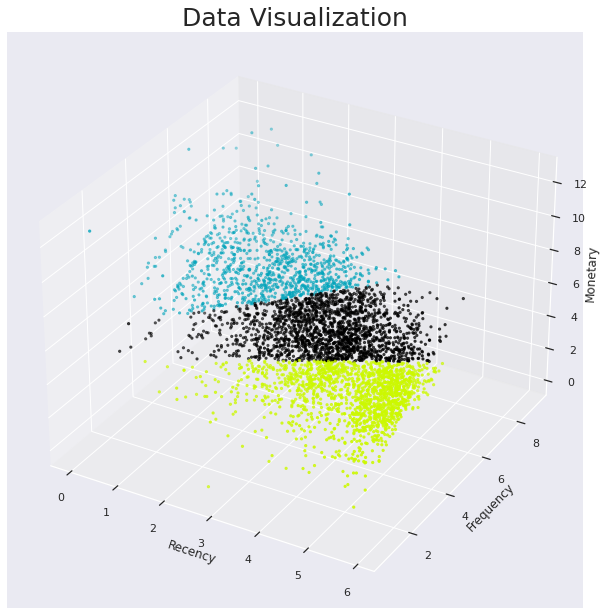

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
x = RFM['Recency']
y = RFM['Frequency']
z = RFM['Monetary']
colors = cm.nipy_spectral(cluster_labels.astype(float) / 3)
ax.scatter(x, y, z, c=colors, marker='.')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title("Data Visualization", size=25)

In [ ]:
# add cluster label as varable
RFM['Cluster'] = cluster_labels
RFM.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,5.786897,0.693147,11.253955,0
12347.0,1.098612,5.209486,8.368925,1
12348.0,4.330733,3.465736,7.494564,0
12349.0,2.944439,4.304065,7.472245,0
12350.0,5.739793,2.890372,5.815324,2


In [ ]:
RFMfinal = RFM.groupby('Cluster').mean()

In [ ]:
RFMfinal

,Recency,Frequency,Monetary
Cluster,,,
0,3.796682,3.989617,6.761070
1,2.097744,5.144397,8.061667
2,4.887460,2.540927,5.457350


In [ ]:
RFMfinal= RFMfinal.applymap(np.exp)
RFMfinal = RFMfinal.applymap(int)
RFMfinal

,Recency,Frequency,Monetary
Cluster,,,
0,44,54,863
1,8,171,3170
2,132,12,234


In [ ]:
DICTC = {"CLUSTER":["0","1", "2"],
  "Intepretation":["At par recency,frequency and monetary spending", "most recent and frequent transaction and high monetary spending", "No recent or frequent transaction with least monetary spending"],
  "Optimal_Number_of_cluster":['MODERATELY LOYAL CUSTOMERS','LOYAL(TARGET)CUSTOMERS','AT RISK CUSTOMERS']}

In [ ]:
InterpretationSummary = pd.DataFrame(DICTC)

In [ ]:
InterpretationSummary.head()

,CLUSTER,Intepretation,Optimal_Number_of_cluster
0,0,"At par recency,frequency and monetary spending",MODERATELY LOYAL CUSTOMERS
1,1,most recent and frequent transaction and high ...,LOYAL(TARGET)CUSTOMERS
2,2,No recent or frequent transaction with least m...,AT RISK CUSTOMERS
